## Clustering Music

### Dataset
- Billboard hot 100 from 1999 to 2020 [kaggle link](https://www.kaggle.com/danield2255/data-on-songs-from-billboard-19992019)
- Audio features of 160,000 or more songs between 1921 and 2020 (spotify) [kaggle link](https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks)

### Goal
- **Visualize clusters of hot 100 songs easily**
- which can be developed to recommendation system

### Process
1. Merge datasets (billboard hot 100 songs + attributes by Spotify)
2. Cluster songs
3. Visualize: make radar charts and export song list

### Study point
- Pandas merge(join) tables
- KMeans clustering
- Visualizing by radar

------

## Dataset
Explore datasets and make a table for work

In [292]:
import pandas as pd
import numpy as np
import os
import re

In [293]:
path_spotify = 'dataset/spotify'
artist = pd.read_csv(os.path.join(path_spotify, 'data_by_artist.csv'))
genre = pd.read_csv(os.path.join(path_spotify, 'data_by_genres.csv'))
year = pd.read_csv(os.path.join(path_spotify, 'data_by_year.csv'))
wgenre = pd.read_csv(os.path.join(path_spotify, 'data_w_genres.csv'))
data = pd.read_csv(os.path.join(path_spotify, 'data.csv'))

In [294]:
print(artist.shape)
print(genre.shape)
print(year.shape)
print(wgenre.shape)
print(data.shape)

(32539, 15)
(3232, 14)
(102, 14)
(32539, 16)
(174389, 19)


In [295]:
artist.sample(3) # pivot by artists

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
30911,Walter Jenckel,0.975333,0.287333,300742.166667,0.157283,5.955067e-02,0.196833,-17.534167,0.084800,88.243333,0.099983,0.000000,4,1,6
6360,Da Huge,0.000156,0.803000,420580.000000,0.503000,4.670000e-01,0.082700,-8.762000,0.077800,128.001000,0.272000,0.000000,6,1,2
2150,Asking Alexandria,0.009023,0.323286,242417.285714,0.914429,8.214286e-07,0.296800,-3.376000,0.140771,144.928143,0.225086,58.714286,2,0,14


In [297]:
print(data.columns)
data.sample(3)

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')


,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
9783,0.375,['Led Zeppelin'],0.411,402761,0.466,0,38KeSzb6FZYSogDXpc7xz8,0.000085,4,0.142,-11.537,0,Babe I'm Gonna Leave You - Remaster,51,1969-01-12,0.0332,136.093,0.158,1969
164557,0.384,['Ohio Players'],0.502,263053,0.676,0,5XcSCmKLfrlBTJLQYW08cL,0.000033,5,0.346,-9.046,0,Players Balling (Players Doin' Their Own Thing),20,1972-02-01,0.2850,174.582,0.682,1972
91429,0.489,['The Swinging Blue Jeans'],0.528,128187,0.836,0,5qV371kqezRjGh0DkHZlJs,0.000000,2,0.165,-6.826,1,Das ist Prima (Shakin' Feeling) - German Versi...,1,2008-07-21,0.0722,86.909,0.815,2008


In [298]:
data = data.drop(['id', 'duration_ms', 'release_date'], axis=1) # drop 3 columns not to use
print(len(data.columns))
print(data.columns)

16
Index(['acousticness', 'artists', 'danceability', 'energy', 'explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'name',
       'popularity', 'speechiness', 'tempo', 'valence', 'year'],
      dtype='object')


In [300]:
path_bb = 'dataset/BillboardFromLast20'
hot100 = pd.read_csv(os.path.join(path_bb, 'billboardHot100_1999-2019.csv'), index_col=0)

In [301]:
print(len(hot100.columns))
print(hot100.columns)

11
Index(['Artists', 'Name', 'Weekly.rank', 'Peak.position', 'Weeks.on.chart',
       'Week', 'Date', 'Genre', 'Writing.Credits', 'Lyrics', 'Features'],
      dtype='object')


In [302]:
hot100 = hot100.drop(['Writing.Credits', 'Features', 'Lyrics', 'Date'], axis=1)
print(hot100.columns)
print(hot100.shape)

Index(['Artists', 'Name', 'Weekly.rank', 'Peak.position', 'Weeks.on.chart',
       'Week', 'Genre'],
      dtype='object')
(97225, 7)


- merge two datasets: **on hot 100 table**

In [303]:
# 공백, 따옴표, 특수문자 제거 후 소문자 처리
def process(str_):
    'preprocess titles to merge two tables'
    bullets = r'[-◇▲○■▶◆#※♢]'
    parentheses = '[\[\]\(\)\<\>\{\}]'
    comma = """,|['"]"""
    spaces = '\s{1,5}'
    
    str_ = re.sub(bullets, '', str_)
    str_ = re.sub(parentheses, '', str_)
    str_ = re.sub(comma, '', str_)
    str_ = re.sub(spaces, '', str_)
    
    return str_.lower()

In [304]:
data['artists_'] = data['artists'].apply(process)
data['name_'] = data['name'].apply(process)
print(data.shape)
data[['artists', 'artists_', 'name', 'name_']].head(3)

(174389, 18)


,artists,artists_,name,name_
0,['Mamie Smith'],mamiesmith,Keep A Song In Your Soul,keepasonginyoursoul
1,"[""Screamin' Jay Hawkins""]",screaminjayhawkins,I Put A Spell On You,iputaspellonyou
2,['Mamie Smith'],mamiesmith,Golfing Papa,golfingpapa


In [305]:
hot100['artists_'] = hot100['Artists'].apply(process)
hot100['name_'] = hot100['Name'].apply(process)
print(hot100.shape)
hot100[['Artists', 'artists_', 'Name', 'name_']].head(3)

(97225, 9)


,Artists,artists_,Name,name_
1,"Lil Nas,",lilnas,Old Town Road,oldtownroad
2,"Shawn Mendes, Camila Cabello",shawnmendescamilacabello,Senorita,senorita
3,Billie Eilish,billieeilish,Bad Guy,badguy


In [308]:
merge_right = pd.merge(data, hot100, how='right', on=['name_', 'artists_'])
print(merge_right.shape)
print(merge_right.columns)
merge_right.sample(3)

(109744, 25)
Index(['acousticness', 'artists', 'danceability', 'energy', 'explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'name',
       'popularity', 'speechiness', 'tempo', 'valence', 'year', 'artists_',
       'name_', 'Artists', 'Name', 'Weekly.rank', 'Peak.position',
       'Weeks.on.chart', 'Week', 'Genre'],
      dtype='object')


,acousticness,artists,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,...,year,artists_,name_,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart,Week,Genre
57783,0.582,['Anthony Hamilton'],0.650,0.501,0.0,0.0,10.0,0.112,-6.905,1.0,...,2005.0,anthonyhamilton,cantletgo,Anthony Hamilton,Can't Let Go,78,71.0,7.0,2006-04-26,"Soul,R&;B"
77878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,daftpunk,getlucky,Daft Punk,Get Lucky,4,2.0,16.0,2013-08-16,"Dance,Electro-Pop,R&;B,Adult Alternative,Adult..."
11654,0.113,['Taylor Swift'],0.667,0.659,0.0,0.0,2.0,0.325,-4.932,1.0,...,2006.0,taylorswift,oursong,Taylor Swift,Our Song,31,16.0,31.0,2008-05-08,"Pop Country,Country,Pop"


In [309]:
# drop rows which have null attributes
table = merge_right.loc[merge_right['danceability'].notnull()]
print(table.shape)
table.head(3)

(65933, 25)


,acousticness,artists,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,...,year,artists_,name_,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart,Week,Genre
0,0.812,['Gene Autry'],0.843,0.418,0.0,0.0,1.0,0.199,-9.420,1.0,...,1951.0,geneautry,herecomessantaclaus,Gene Autry,Here Comes Santa Claus,28,28.0,3.0,2019-01-05,"Christmas,Pop"
1,0.834,['Gene Autry'],0.608,0.468,0.0,0.0,0.0,0.262,-8.557,1.0,...,1965.0,geneautry,herecomessantaclaus,Gene Autry,Here Comes Santa Claus,28,28.0,3.0,2019-01-05,"Christmas,Pop"
2,0.812,['Gene Autry'],0.843,0.418,0.0,0.0,1.0,0.199,-9.420,1.0,...,1951.0,geneautry,herecomessantaclaus,Gene Autry,Here Comes Santa Claus,35,35.0,2.0,2018-12-29,"Christmas,Pop"


- **Drop duplicates**

In [310]:
# Drop duplicates by (name, artist), keep top rank
sorted_table = table.sort_values(by='Weekly.rank', ascending=True) # sorting ascending(default)
dropped = sorted_table.drop_duplicates(subset=['artists', 'name'], keep='first', inplace=False)
dropped.reset_index(inplace=True)
print('length of dropped: {:,}'.format(len(dropped)))
dropped.head(3)

length of dropped: 3,132


,index,acousticness,artists,danceability,energy,explicit,instrumentalness,key,liveness,loudness,...,year,artists_,name_,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart,Week,Genre
0,40540,0.0472,['Sia'],0.628,0.698,0.0,0.00143,6.0,0.0949,-5.639,...,2017.0,sia,cheapthrills,Sia,Cheap Thrills,1,1.0,6.0,2016-08-27,"Jamaica,Remix,Australia,Rap,Synth-Pop,Pop"
1,18321,0.1380,['Adele'],0.730,0.769,1.0,0.00000,8.0,0.0473,-5.114,...,2011.0,adele,rollinginthedeep,Adele,Rolling In The Deep,1,1.0,8.0,2011-05-19,"Pop,Blues,Adult Alternative,Adult Contemporary..."
2,10271,0.0339,['Mariah Carey'],0.837,0.462,0.0,0.00000,0.0,0.0900,-7.890,...,2005.0,mariahcarey,webelongtogether,Mariah Carey,We Belong Together,1,1.0,1.0,2005-06-22,"R&;B,Pop"


## Cluster
1. explore processed table
2. pick features to use for clustering
3. clustering

In [313]:
attrs = ['acousticness', 'danceability', 'energy', 'explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity',
       'speechiness', 'tempo', 'valence']
len(attrs)

13

In [314]:
dropped[attrs].describe()

,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
count,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000
mean,0.170306,0.614570,0.693334,0.220945,0.008742,5.232439,0.178399,-5.880589,0.686143,60.967114,0.086924,123.137410,0.507963
std,0.213603,0.140479,0.175974,0.414950,0.063887,3.575476,0.134695,2.217050,0.464133,11.597690,0.093578,30.040273,0.223265
min,0.000003,0.113000,0.056100,0.000000,0.000000,0.000000,0.019300,-23.023000,0.000000,0.000000,0.022500,48.718000,0.034900
25%,0.016200,0.523000,0.575000,0.000000,0.000000,2.000000,0.094400,-7.048500,0.000000,54.000000,0.033600,97.999000,0.331750
50%,0.077000,0.615500,0.719000,0.000000,0.000000,5.000000,0.124000,-5.526000,1.000000,61.000000,0.047400,121.995500,0.505500
75%,0.246000,0.708000,0.833000,0.000000,0.000027,8.000000,0.226250,-4.318000,1.000000,69.000000,0.090875,144.008750,0.676250
max,0.987000,0.965000,0.996000,1.000000,0.989000,11.000000,0.962000,-0.517000,1.000000,90.000000,0.649000,210.857000,0.978000


In [315]:
print(dropped['explicit'].value_counts())
print(dropped['mode'].value_counts())

0.0    2440
1.0     692
Name: explicit, dtype: int64
1.0    2149
0.0     983
Name: mode, dtype: int64


**NOTE**

- Popularity cannot be an attribute.
- Explicit and mode are categorical (0 or 1), drop.


In [316]:
attrs = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence']
print('# of attributes: {}'.format(len(attrs)))

# of attributes: 10


**Preprocessing**: normalize attrs.

In [318]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [319]:
# before normalizing
dropped[attrs].head(3)

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence
0,0.0472,0.628,0.698,0.00143,6.0,0.0949,-5.639,0.1030,89.971,0.733
1,0.1380,0.730,0.769,0.00000,8.0,0.0473,-5.114,0.0298,104.948,0.507
2,0.0339,0.837,0.462,0.00000,0.0,0.0900,-7.890,0.0601,139.986,0.762


In [320]:
# after normalizing
normed = dropped.copy()
mms = MinMaxScaler()
mms.fit(normed[attrs])
normed[attrs] = mms.transform(normed[attrs])
normed[attrs].head(3)

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence
0,0.047819,0.604460,0.682945,0.001446,0.545455,0.080195,0.772416,0.128492,0.254430,0.740218
1,0.139815,0.724178,0.758485,0.000000,0.727273,0.029702,0.795743,0.011652,0.346801,0.500583
2,0.034343,0.849765,0.431854,0.000000,0.000000,0.074997,0.672398,0.060016,0.562900,0.770968


In [321]:
# after normalizing
normed[attrs].describe()

,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence
count,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000,3132.000000
mean,0.172547,0.588697,0.677981,0.008839,0.475676,0.168769,0.761682,0.102831,0.458985,0.501604
std,0.216417,0.164881,0.187226,0.064598,0.325043,0.142883,0.098509,0.149366,0.185275,0.236735
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.016410,0.481221,0.552080,0.000000,0.181818,0.079665,0.709789,0.017717,0.303943,0.314760
50%,0.078011,0.589789,0.705288,0.000000,0.454545,0.111064,0.777437,0.039745,0.451942,0.498993
75%,0.249238,0.698357,0.826577,0.000027,0.727273,0.219529,0.831112,0.109138,0.587710,0.680045
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [322]:
normed[attrs].describe().loc['std'].sort_values()

instrumentalness    0.064598
loudness            0.098509
liveness            0.142883
speechiness         0.149366
danceability        0.164881
tempo               0.185275
energy              0.187226
acousticness        0.216417
valence             0.236735
key                 0.325043
Name: std, dtype: float64

**NOTE**  
find appropriate distribution for clustering
- instrumentalness: all low
- loudness: all high
- liveness: too low
- speechiness: too low
- danceability: central
- energy: central
- tempo: central
- acousticness: low a little
- valence: central
- key: suitable

In [323]:
# test
attrs1 = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence'] # all
attrs2 = ['acousticness', 'danceability', 'energy', 'key', 'liveness',
       'speechiness', 'tempo', 'valence'] # inst. loud.
attrs3 = ['acousticness', 'danceability', 'energy', 'key', 'tempo', 'valence'] # live. speech.

**TEST LIST**

1. attrs1, k=7
2. attrs1, k=5
3. attrs2, k=7
4. attrs2, k=5
5. attrs3, k=5: not 7 for attrs3 because # of features in attrs3 is 5.

**Clustering** and **visualizing**

In [324]:
import matplotlib.pyplot as plt
from math import pi
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

In [325]:
state = 42

def get_clusters(df, attrs, k=5):
    'append the cluster number column'
    song_vectors = df[attrs].to_numpy()
    kmeans = KMeans(n_clusters=k, max_iter=10, n_init=1, verbose=False, random_state=state)
    clusters = kmeans.fit_predict(song_vectors)
    df_ = df.copy()
    df_['cluster'] = clusters
    return df_

def radar(df, attrs):
    num_attrs = len(attrs)
    num_clusters = len(df)
    
    angles = [x/float(num_attrs)*(2*pi) for x in range(num_attrs)]
    angles += angles[:1]
    
    my_palette = plt.cm.get_cmap('Set2', len(df))
    if num_clusters == 5:
        fig = plt.figure(figsize=(20,15))
    else:
        fig = plt.figure(figsize=(20,20))
    fig.set_facecolor('white')
    
    for i, row in df.iterrows():
        color = my_palette(i)
        data = df.loc[i].tolist()
        data += data[:1]
        
        if num_clusters == 5:
            ax = plt.subplot(2, 3, i+1, polar=True)
        else:
            ax = plt.subplot(3, 3, i+1, polar=True)
        ax.set_theta_offset(pi/2)
        ax.set_theta_direction(-1)
        
        plt.xticks(angles[:-1], attrs, fontsize=13)
        ax.tick_params(axis='x', which='major', pad=15)
        
        ax.set_rlabel_position(0)
        plt.ylim(0,1)
        
        ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')
        ax.fill(angles, data, color=color, alpha=0.3)
        
        plt.title('Cluster '+str(i), size=20, color=color, x=-0.1, y=1.2, ha='left')
    
    plt.tight_layout(pad=3)
    plt.show()

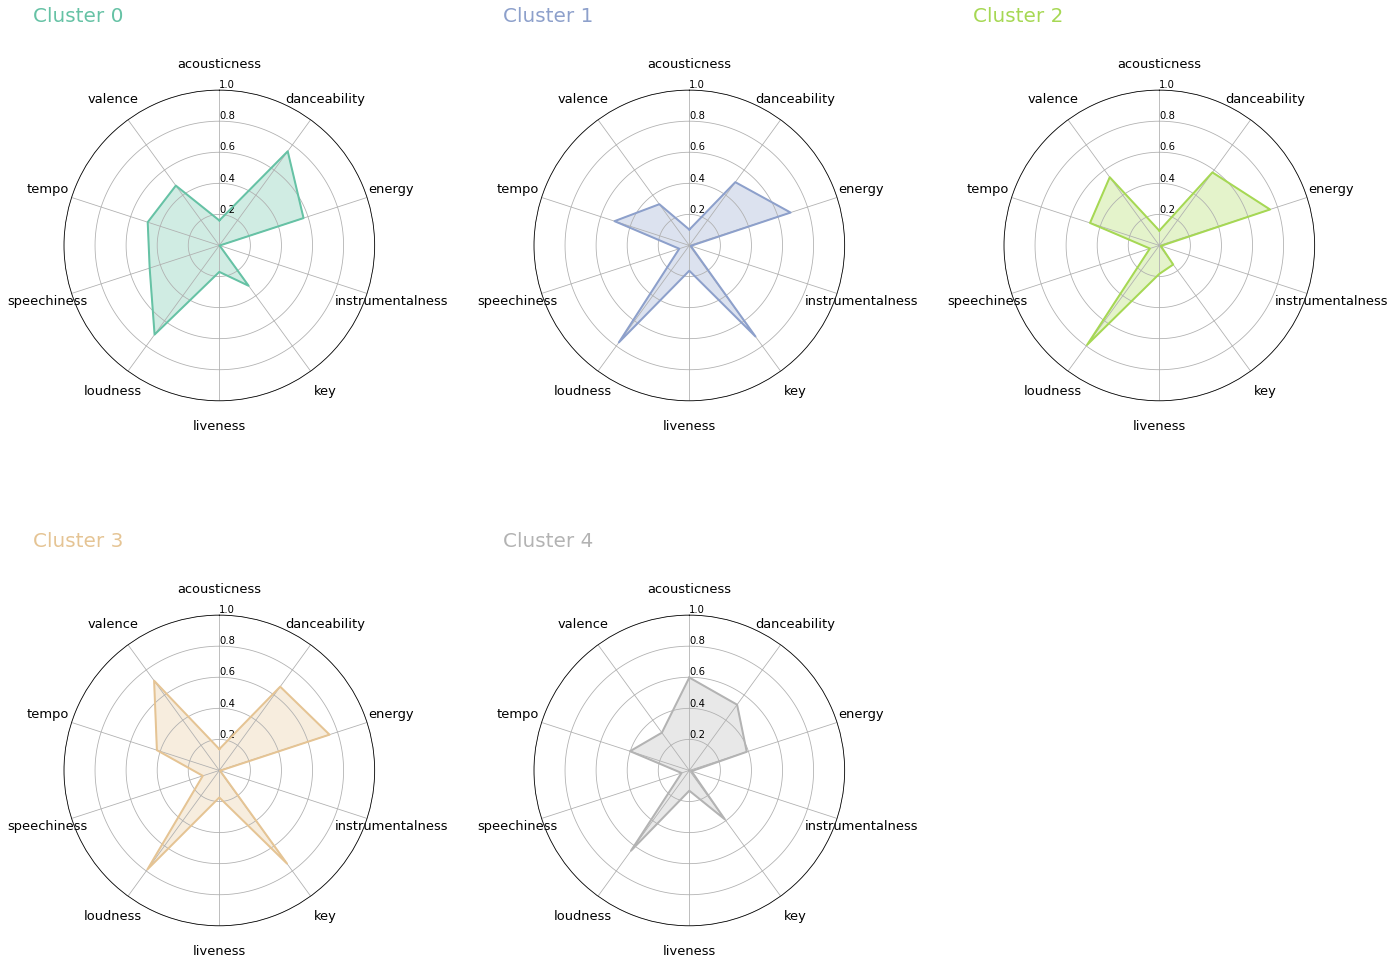

In [326]:
df1 = get_clusters(normed, attrs1, k=5)
df1_radar = pd.pivot_table(df1, index='cluster', values=attrs1, aggfunc='mean')
radar(df1_radar, attrs1)

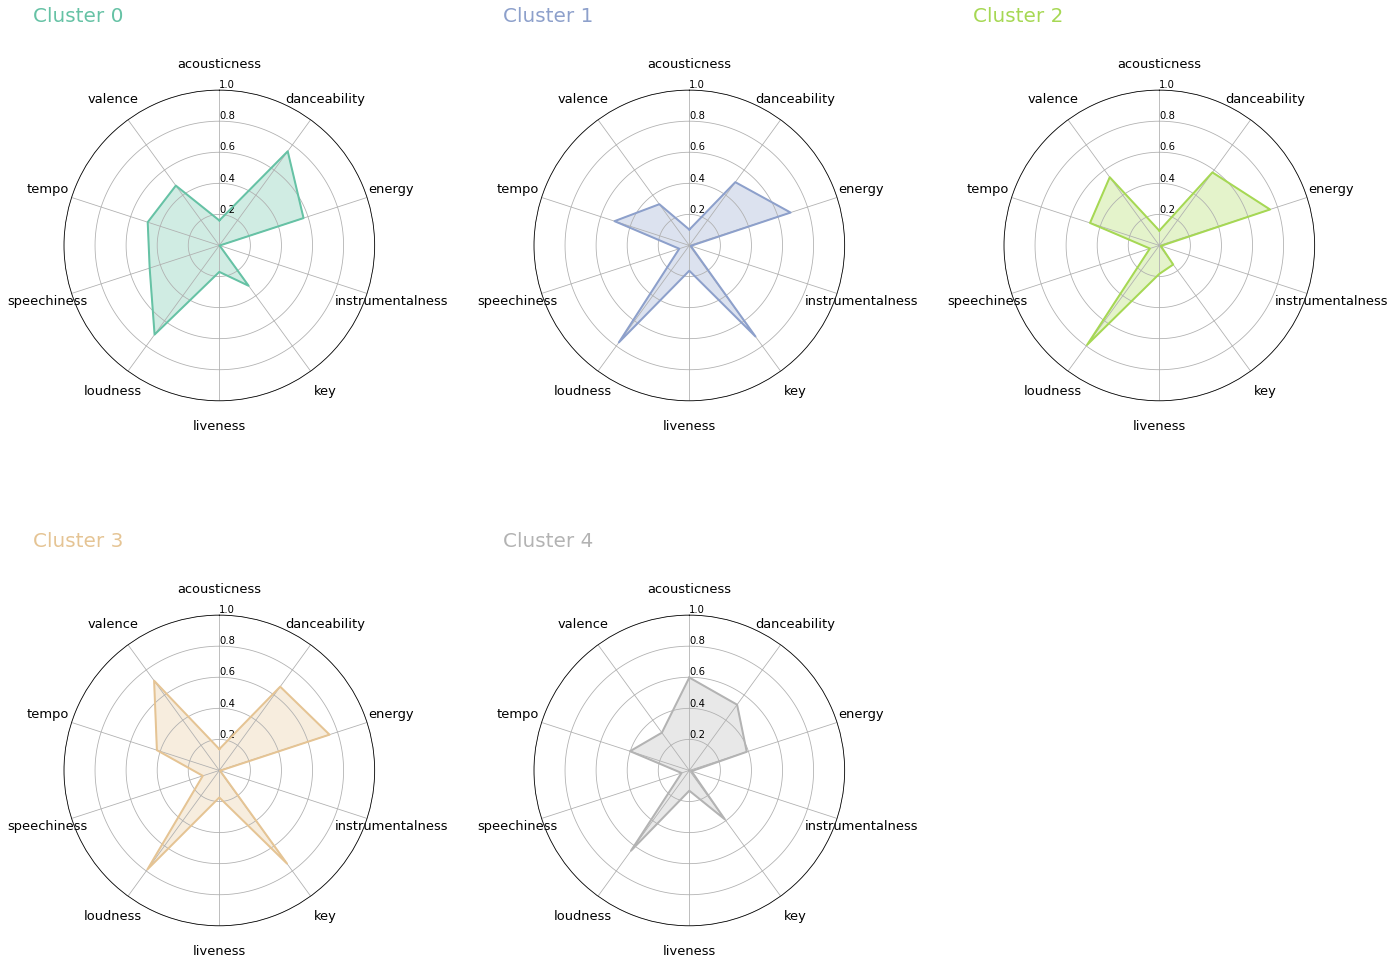

In [327]:
df2 = get_clusters(normed, attrs1, k=5)
df2_radar = pd.pivot_table(df2, index='cluster', values=attrs1, aggfunc='mean')
radar(df2_radar, attrs1)

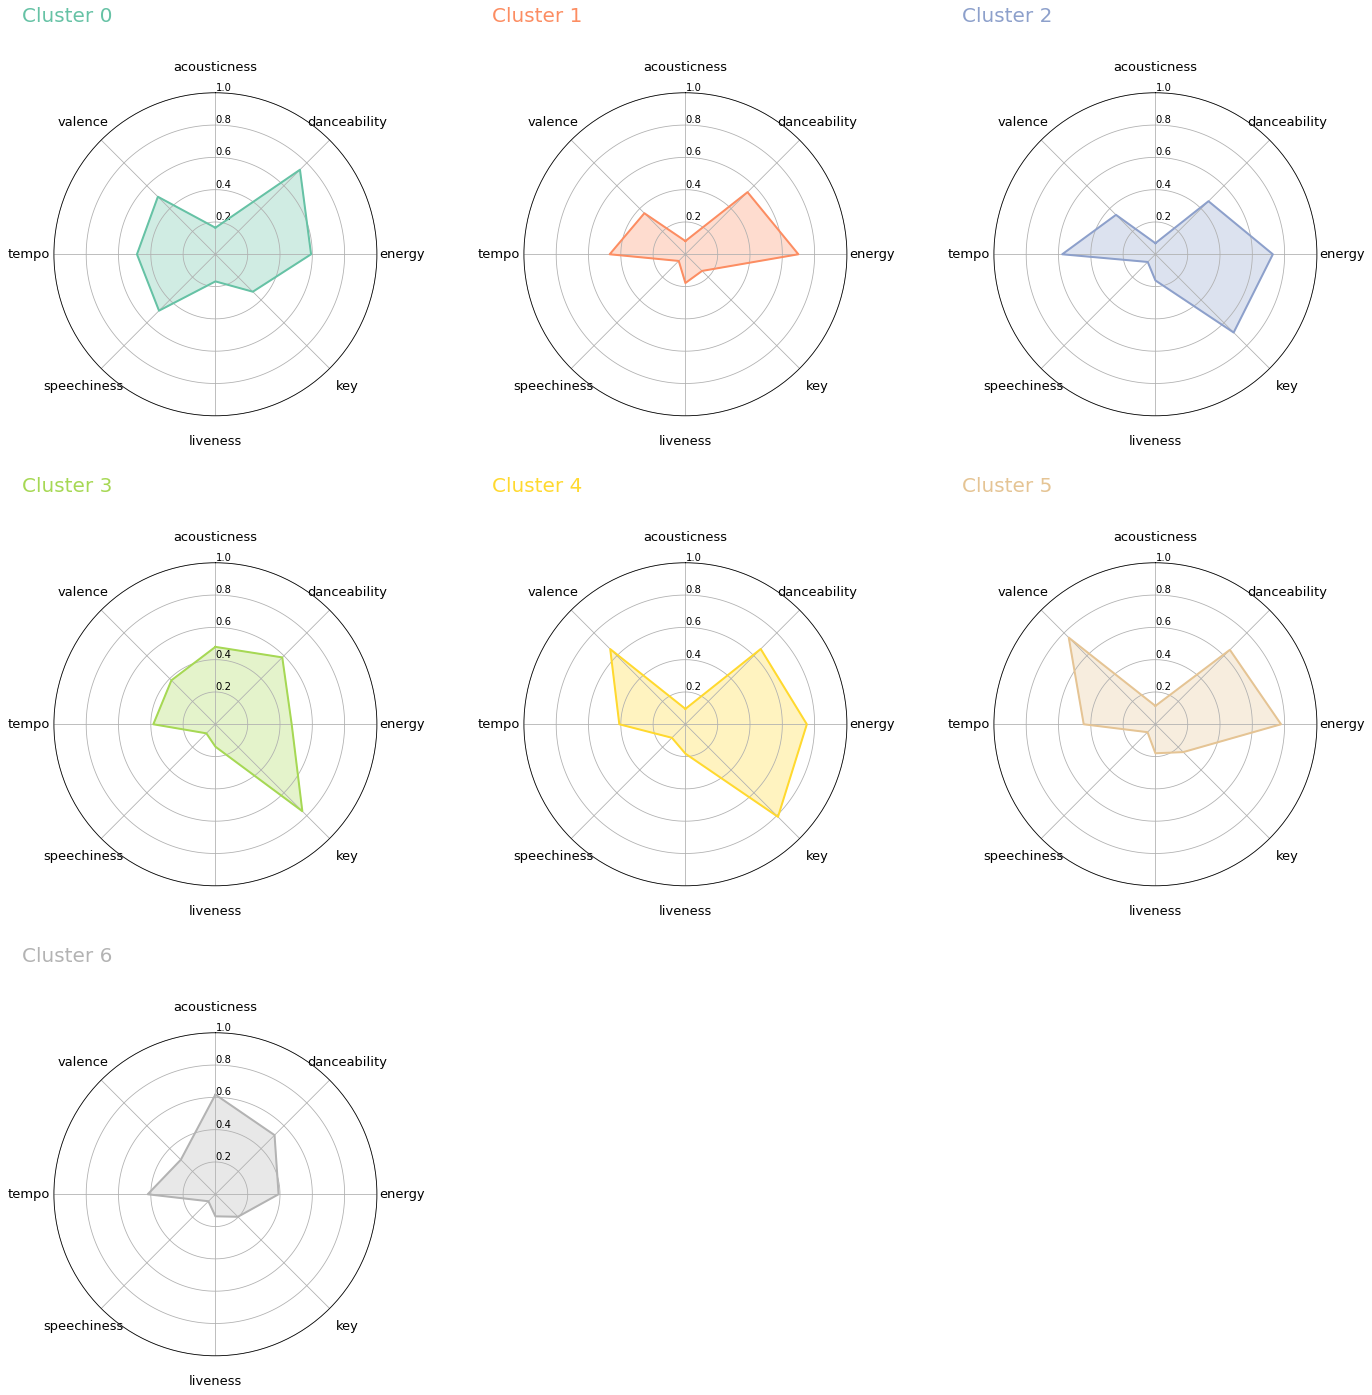

In [328]:
df3 = get_clusters(normed, attrs2, k=7)
df3_radar = pd.pivot_table(df3, index='cluster', values=attrs2, aggfunc='mean')
radar(df3_radar, attrs2)

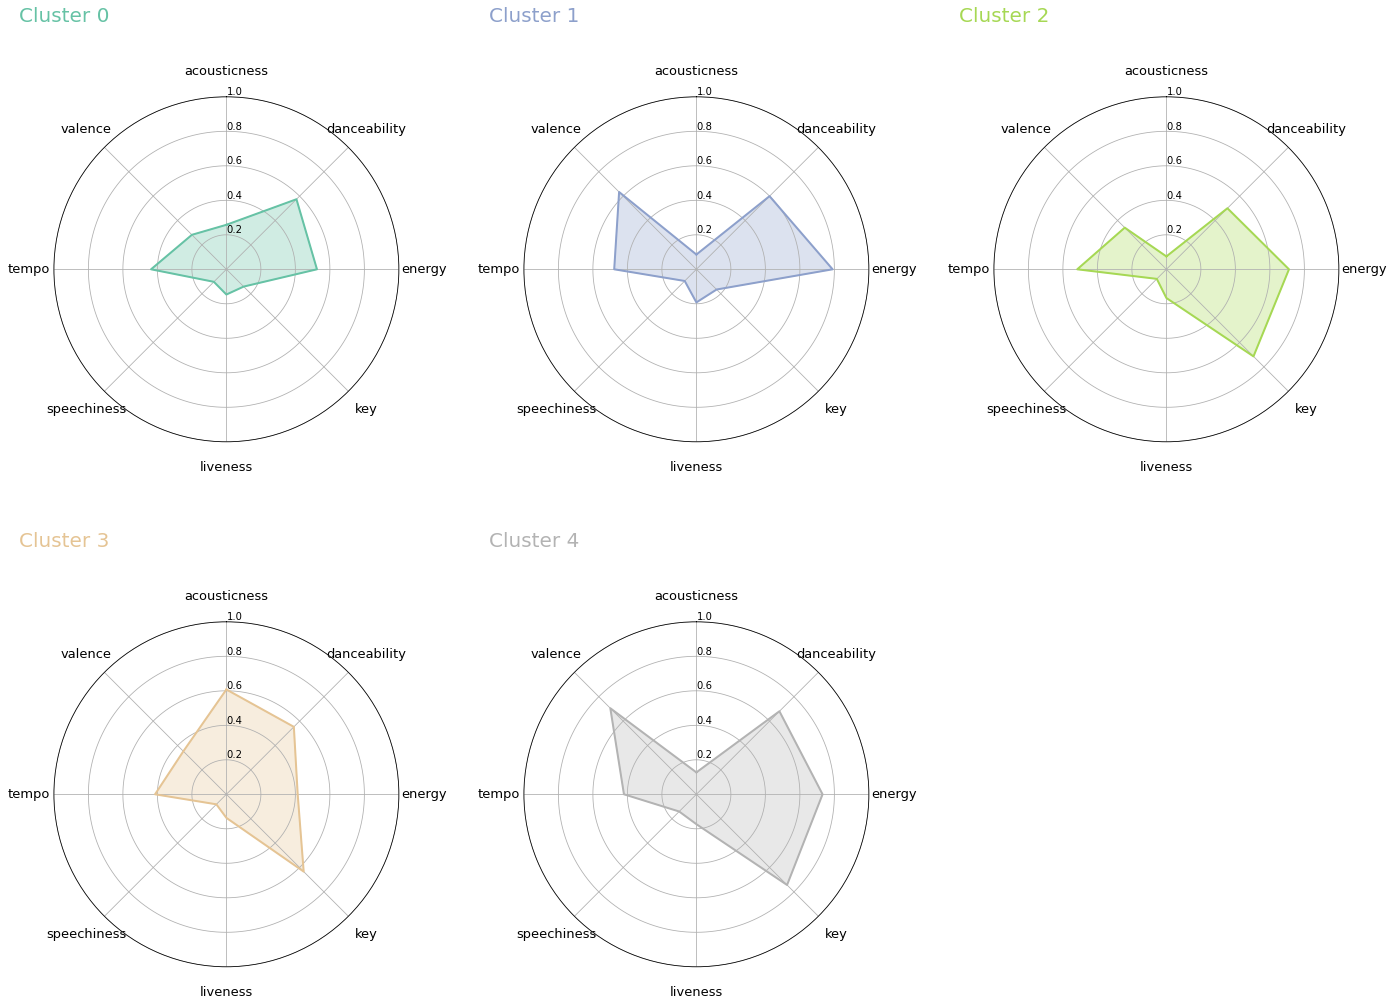

In [329]:
df4 = get_clusters(normed, attrs2, k=5)
df4_radar = pd.pivot_table(df4, index='cluster', values=attrs2, aggfunc='mean')
radar(df4_radar, attrs2)

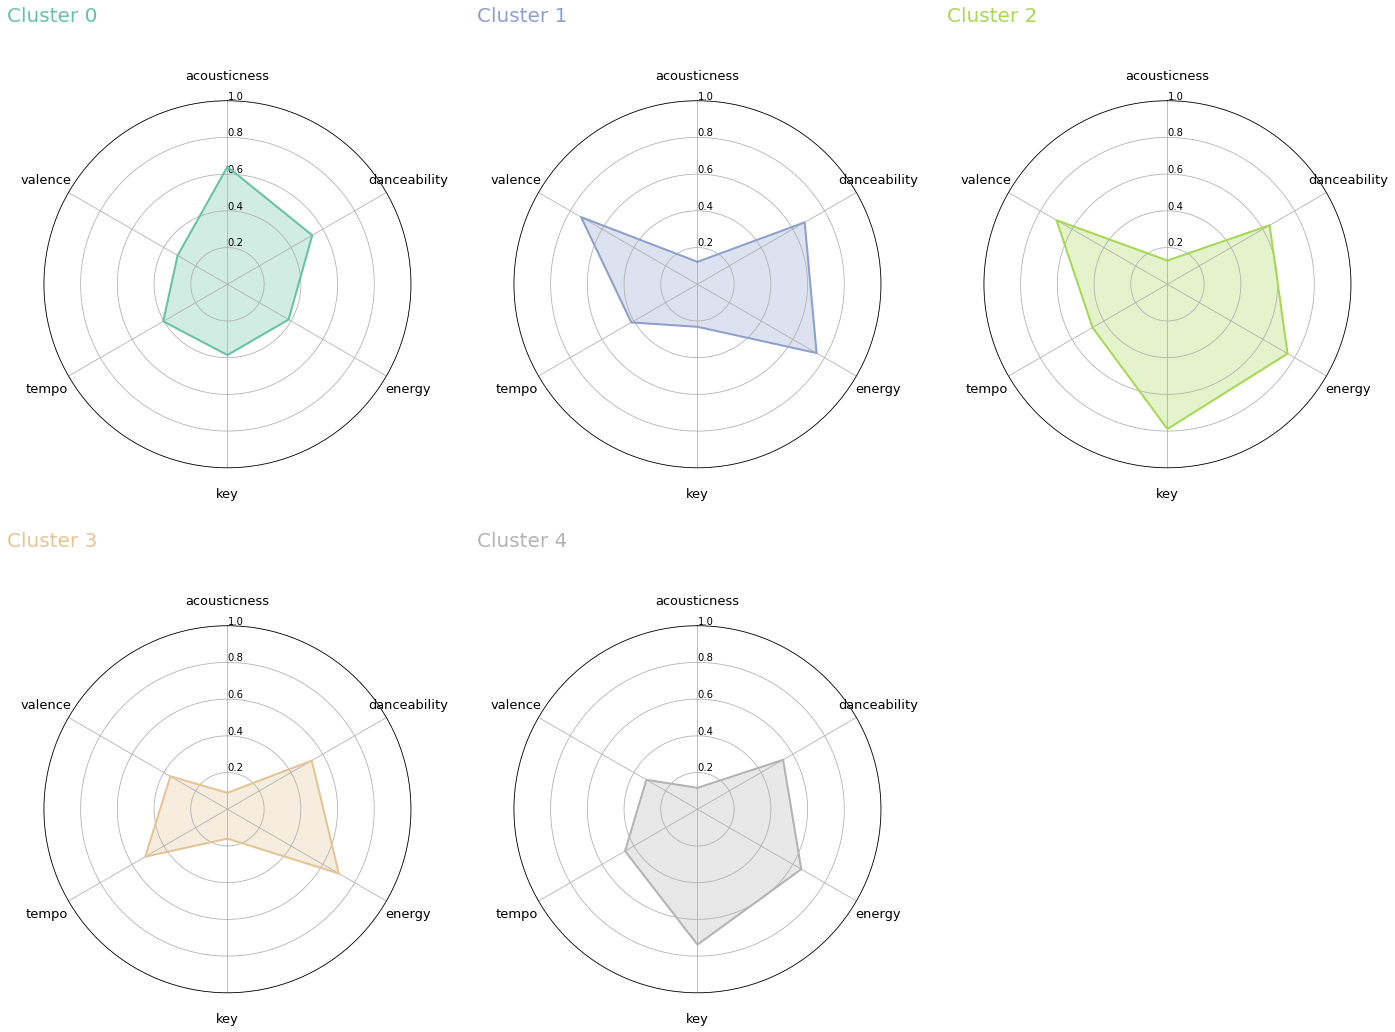

In [330]:
df5 = get_clusters(normed, attrs3, k=5)
df5_radar = pd.pivot_table(df5, index='cluster', values=attrs3, aggfunc='mean')
radar(df5_radar, attrs3)

## Explore Each Cluster
---
1. count
2. most frequent artists
3. top ranked songs
---
**LIST**
1. test4: attrs2, k=5
2. test5: attrs3, k=5

In [331]:
from collections import Counter

class cluster_inform:
    
    def __init__(self, df):
        self.df = df
        self.num_clusters = len(self.df['cluster'].unique())
        
    def get_counting(self):
        'get distribution'
        self.total = len(self.df)
        df_ = pd.pivot_table(self.df, index='cluster', values='Name', aggfunc='count')
        df_.columns = ['count']
        df_['rate(%)'] = round(100*df_['count']/self.total)
        print('total count: {:,}'.format(self.total))
        return df_
    
    def get_artists(self, k=5):
        'get top K artists in each cluster'
        self.artists = list()
        
        for i in range(self.num_clusters):
            df_ = self.df.loc[self.df['cluster']==i, ['Artists', 'Name']]
            counter = Counter()
            counter.update(df_.Artists)
            self.artists.append(counter.most_common()[:k])
            
        for i in range(len(self.artists)):
            print('*** Frequent Artists in Cluster {} ***'.format(str(i)))
            print(self.artists[i])
            print(' ')
            
    def get_songs(self, k=10):
        'get top K songs in each cluster'
        self.songs = list()
        
        for i in range(self.num_clusters):
            df_ = self.df.loc[self.df['cluster']==i, ['Artists', 'Name', 'Weekly.rank', 'Week', 'cluster']]
            sorted_table = df_.sort_values(by='Weekly.rank')[:k].reset_index(drop=True)
            self.songs.append(sorted_table)   
        for i in range(len(self.songs)):
            print('*** Top Ranked Songs in Cluster {} ***'.format(str(i)))
            print(self.songs[i][['Artists', 'Name', 'Week']])
            print(' ')
            
    def get_songs_csv(self, fname):
        'export songs to csv file'
        filename = fname + '.csv'
        table = pd.concat([self.songs[0], self.songs[1], self.songs[2], self.songs[3], self.songs[4]], axis=0)
        table.to_csv(filename, index=False)
        print('{} has been exported'.format(filename))

**test4: attrs2 & k=5**

In [332]:
t4 = cluster_inform(df4)
t4.get_counting()

total count: 3,132


,count,rate(%)
cluster,,
0,499,16.0
1,837,27.0
2,709,23.0
3,310,10.0
4,777,25.0


In [333]:
t4.get_artists()

*** Frequent Artists in Cluster 0 ***
[('Drake', 19), ('Taylor Swift', 14), ('Kanye West', 9), ('Ariana Grande', 8), ('The Weeknd', 7)]
 
*** Frequent Artists in Cluster 1 ***
[('Taylor Swift', 14), ('One Direction', 12), ('Maroon 5', 9), ('Fall Out Boy', 9), ('Keith Urban', 9)]
 
*** Frequent Artists in Cluster 2 ***
[('Taylor Swift', 19), ('Drake', 13), ('Jason Aldean', 10), ('Coldplay', 9), ('Nickelback', 8)]
 
*** Frequent Artists in Cluster 3 ***
[('Billie Eilish', 11), ('J. Cole', 7), ('Ed Sheeran', 7), ('John Mayer', 7), ('XXXTENTACION', 7)]
 
*** Frequent Artists in Cluster 4 ***
[('Taylor Swift', 12), ('Britney Spears', 11), ('Eminem', 11), ('Drake', 8), ('Nicki Minaj', 8)]
 


In [334]:
t4.get_songs(k=20)

*** Top Ranked Songs in Cluster 0 ***
              Artists                 Name        Week
0         James Blunt     You're Beautiful  2006-03-08
1            Lonestar               Amazed  2000-03-07
2          The Weeknd            The Hills  2015-10-09
3               Drake       In My Feelings  2018-09-08
4              Eminem        Lose Yourself  2003-01-14
5       Ariana Grande              7 Rings  2019-02-02
6       Ariana Grande        Thank U, Next  2018-11-17
7               Sisqo           Incomplete  2000-08-08
8          Bruno Mars              Grenade  2011-01-06
9            Maroon 5       Girls Like You  2018-11-10
10         Bruno Mars  When I Was Your Man  2013-04-19
11        Leona Lewis        Bleeding Love  2008-05-15
12        Alicia Keys               No One  2007-12-26
13              Creed  With Arms Wide Open  2000-11-07
14  twenty one pilots             Heathens  2016-09-24
15  Justin Timberlake              Mirrors  2013-06-14
16         Ed Sheeran    Th

In [335]:
t4.get_songs_csv('test4')

test4.csv has been exported


**test5: attrs3 & k=5**

In [336]:
t5 = cluster_inform(df5)
t5.get_counting()

total count: 3,132


,count,rate(%)
cluster,,
0,346,11.0
1,654,21.0
2,722,23.0
3,701,22.0
4,709,23.0


In [337]:
t5.get_artists()

*** Frequent Artists in Cluster 0 ***
[('Billie Eilish', 12), ('Ed Sheeran', 9), ('XXXTENTACION', 9), ('Adele', 8), ('Sam Smith', 7)]
 
*** Frequent Artists in Cluster 1 ***
[('Taylor Swift', 11), ('Maroon 5', 10), ('Britney Spears', 7), ('Eminem', 7), ('One Direction', 7)]
 
*** Frequent Artists in Cluster 2 ***
[('Taylor Swift', 10), ('Kenny Chesney', 10), ('Eminem', 8), ('Drake', 7), ('Nicki Minaj', 7)]
 
*** Frequent Artists in Cluster 3 ***
[('Drake', 19), ('Taylor Swift', 18), ('Linkin Park', 10), ('Kanye West', 9), ('One Direction', 8)]
 
*** Frequent Artists in Cluster 4 ***
[('Drake', 17), ('Taylor Swift', 16), ('Coldplay', 9), ('The Weeknd', 9), ('Rihanna', 7)]
 


In [338]:
t5.get_songs(k=20)

*** Top Ranked Songs in Cluster 0 ***
                      Artists                    Name        Week
0                 James Blunt        You're Beautiful  2006-03-08
1   Lady Gaga, Bradley Cooper                 Shallow  2019-03-09
2                       Adele                   Hello  2015-12-11
3                    Maroon 5          Girls Like You  2018-11-10
4                 Miley Cyrus           Wrecking Ball  2013-09-27
5               Ariana Grande                 7 Rings  2019-02-02
6             Plain White T's       Hey There Delilah  2007-08-01
7                  Bruno Mars     When I Was Your Man  2013-04-19
8                 John Legend               All Of Me  2014-05-30
9                       Adele        Someone Like You  2011-09-15
10              Justin Bieber           Love Yourself  2016-02-26
11         Christina Aguilera               Beautiful  2003-01-28
12                     Hozier       Take Me To Church  2014-12-19
13                  Sam Smith         